<a href="https://colab.research.google.com/github/alyhas/usaid/blob/master/data_uaid0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import plotly.express as px
from IPython.display import display
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
# Load the data
data = pd.read_csv('/filtered_US_aidpk.csv')

# Display the first few rows
data.head()

Fiscal Year         US Category Name  \
0         2023  Humanitarian Assistance   
1         2023     Economic Development   
2         2023                   Health   
3         2023  Humanitarian Assistance   
4         2023          Program Support   

                                      US Sector Name  Current Dollar Amount  \
0               Protection, Assistance and Solutions               25076538   
1                                        Agriculture                8000000   
2  Pandemic Influenza and Other Emerging Threats ...                6100451   
3               Protection, Assistance and Solutions                5157625   
4                        Direct Administrative Costs                4044723   

                                       Activity Name  \
0                          Emergency Food Assistance   
1                          Emergency food assistance   
2  Integrated Health Systems Strengthening and Se...   
3  Humanitarian Assistance - provide rapid respon...   
4                             USAID Pay and Benefits   

  Implementing Partner Category Name Implementing Partner Sub-category ID  \
0                       Multilateral        Multilateral - United Nations   
1                       Multilateral        Multilateral - United Nations   
2                                NGO                  NGO - United States   
3                                NGO                  NGO - United States   
4                         Government           Government - United States   

                           Implementing Partner Name  
0                                 World Food Program  
1                  Food and Agriculture Organisation  
2                            John Snow International  
3                       NGO - United States Redacted  
4  U.S. Government - U.S. Agency for Internationa...

In [3]:
# Total aid given each year
fig1 = px.bar(data, x='Fiscal Year', y='Current Dollar Amount',
             hover_data=['US Category Name'],  # Add this line
              labels={'Current Dollar Amount':'Dollar Amount (in billions $)',
                      'Fiscal Year': 'Year' , 'US Category Name': 'Ca'},
              title='Total US Aid Given Each Year 2000-2023',
              template='plotly_white')
fig1.update_traces(marker_color='skyblue')
fig1.update_layout(yaxis_tickprefix = '$', yaxis_ticksuffix = 'B')
fig1.show()

# Distribution of aid among different categories
data_category = data.groupby('US Category Name')['Current Dollar Amount'].sum().reset_index()
fig2 = px.pie(data_category, names='US Category Name', values='Current Dollar Amount',
             labels={'US Category Name': 'Category'},
              title='Distribution of Aid Among Categories',
              template='plotly_white')
fig2.show()

# Top 10 sectors receiving aid
data_sector = data.groupby('US Sector Name')['Current Dollar Amount'].sum().nlargest(10).reset_index()
fig3 = px.bar(data_sector, y='US Sector Name', x='Current Dollar Amount',
              labels={'Current Dollar Amount':'Total Dollar Amount (in billions)',
                      'US Sector Name': 'Sector'},
              title='Top 10 Sectors Receiving Aid',
              template='plotly_white', orientation='h')
fig3.update_traces(marker_color='skyblue')
fig3.update_layout(xaxis_tickprefix = '$', xaxis_ticksuffix = 'B')
fig3.show()


In [4]:
import plotly.graph_objects as go

# Create a dataframe for the flow from category to sector
flow = data.groupby(['US Category Name', 'US Sector Name'])['Current Dollar Amount'].sum().reset_index()

# Create a list of all categories and sectors
labels = list(flow['US Category Name'].unique()) + list(flow['US Sector Name'].unique())

# Create a list of source indices
source = [labels.index(x) for x in flow['US Category Name']]

# Create a list of target indices
target = [labels.index(x) for x in flow['US Sector Name']]

# Create a list of values
value = list(flow['Current Dollar Amount'])

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = "blue"
    ),
    link = dict(
        source = source,
        target = target,
        value = value
    )
)])

fig.update_layout(title_text="Sankey Diagram of US Aid to Pakistan", font_size=10)
fig.show()


In [6]:
pip install pandas jupyter-dash dash dash-core-components dash-html-components plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 100.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [9]:
import pandas as pd
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go


# Create a dataframe for the flow from category to sector
flow = data.groupby(['US Category Name', 'US Sector Name'])['Current Dollar Amount'].sum().reset_index()

# Create a list of all categories and sectors
labels = list(flow['US Category Name'].unique()) + list(flow['US Sector Name'].unique())

# Create a list of source indices
source = [labels.index(x) for x in flow['US Category Name']]

# Create a list of target indices
target = [labels.index(x) for x in flow['US Sector Name']]

# Create a list of values
value = list(flow['Current Dollar Amount'])

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = "blue"
    ),
    link = dict(
        source = source,
        target = target,
        value = value
    )
)])

fig.update_layout(title_text="Sankey Diagram of US Aid to Pakistan", font_size=10)

# Initialize the Jupyter Dash app
app = JupyterDash(__name__)

# Define the layout
app.layout = html.Div([
    dcc.Graph(
        id='sankey-diagram',
        figure=fig
    )
])

# Run the app
app.run_server(mode='inline', debug=True)


/usr/local/lib/python3.10/dist-packages/dash/dash.py:516: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
pip install networkx matplotlib

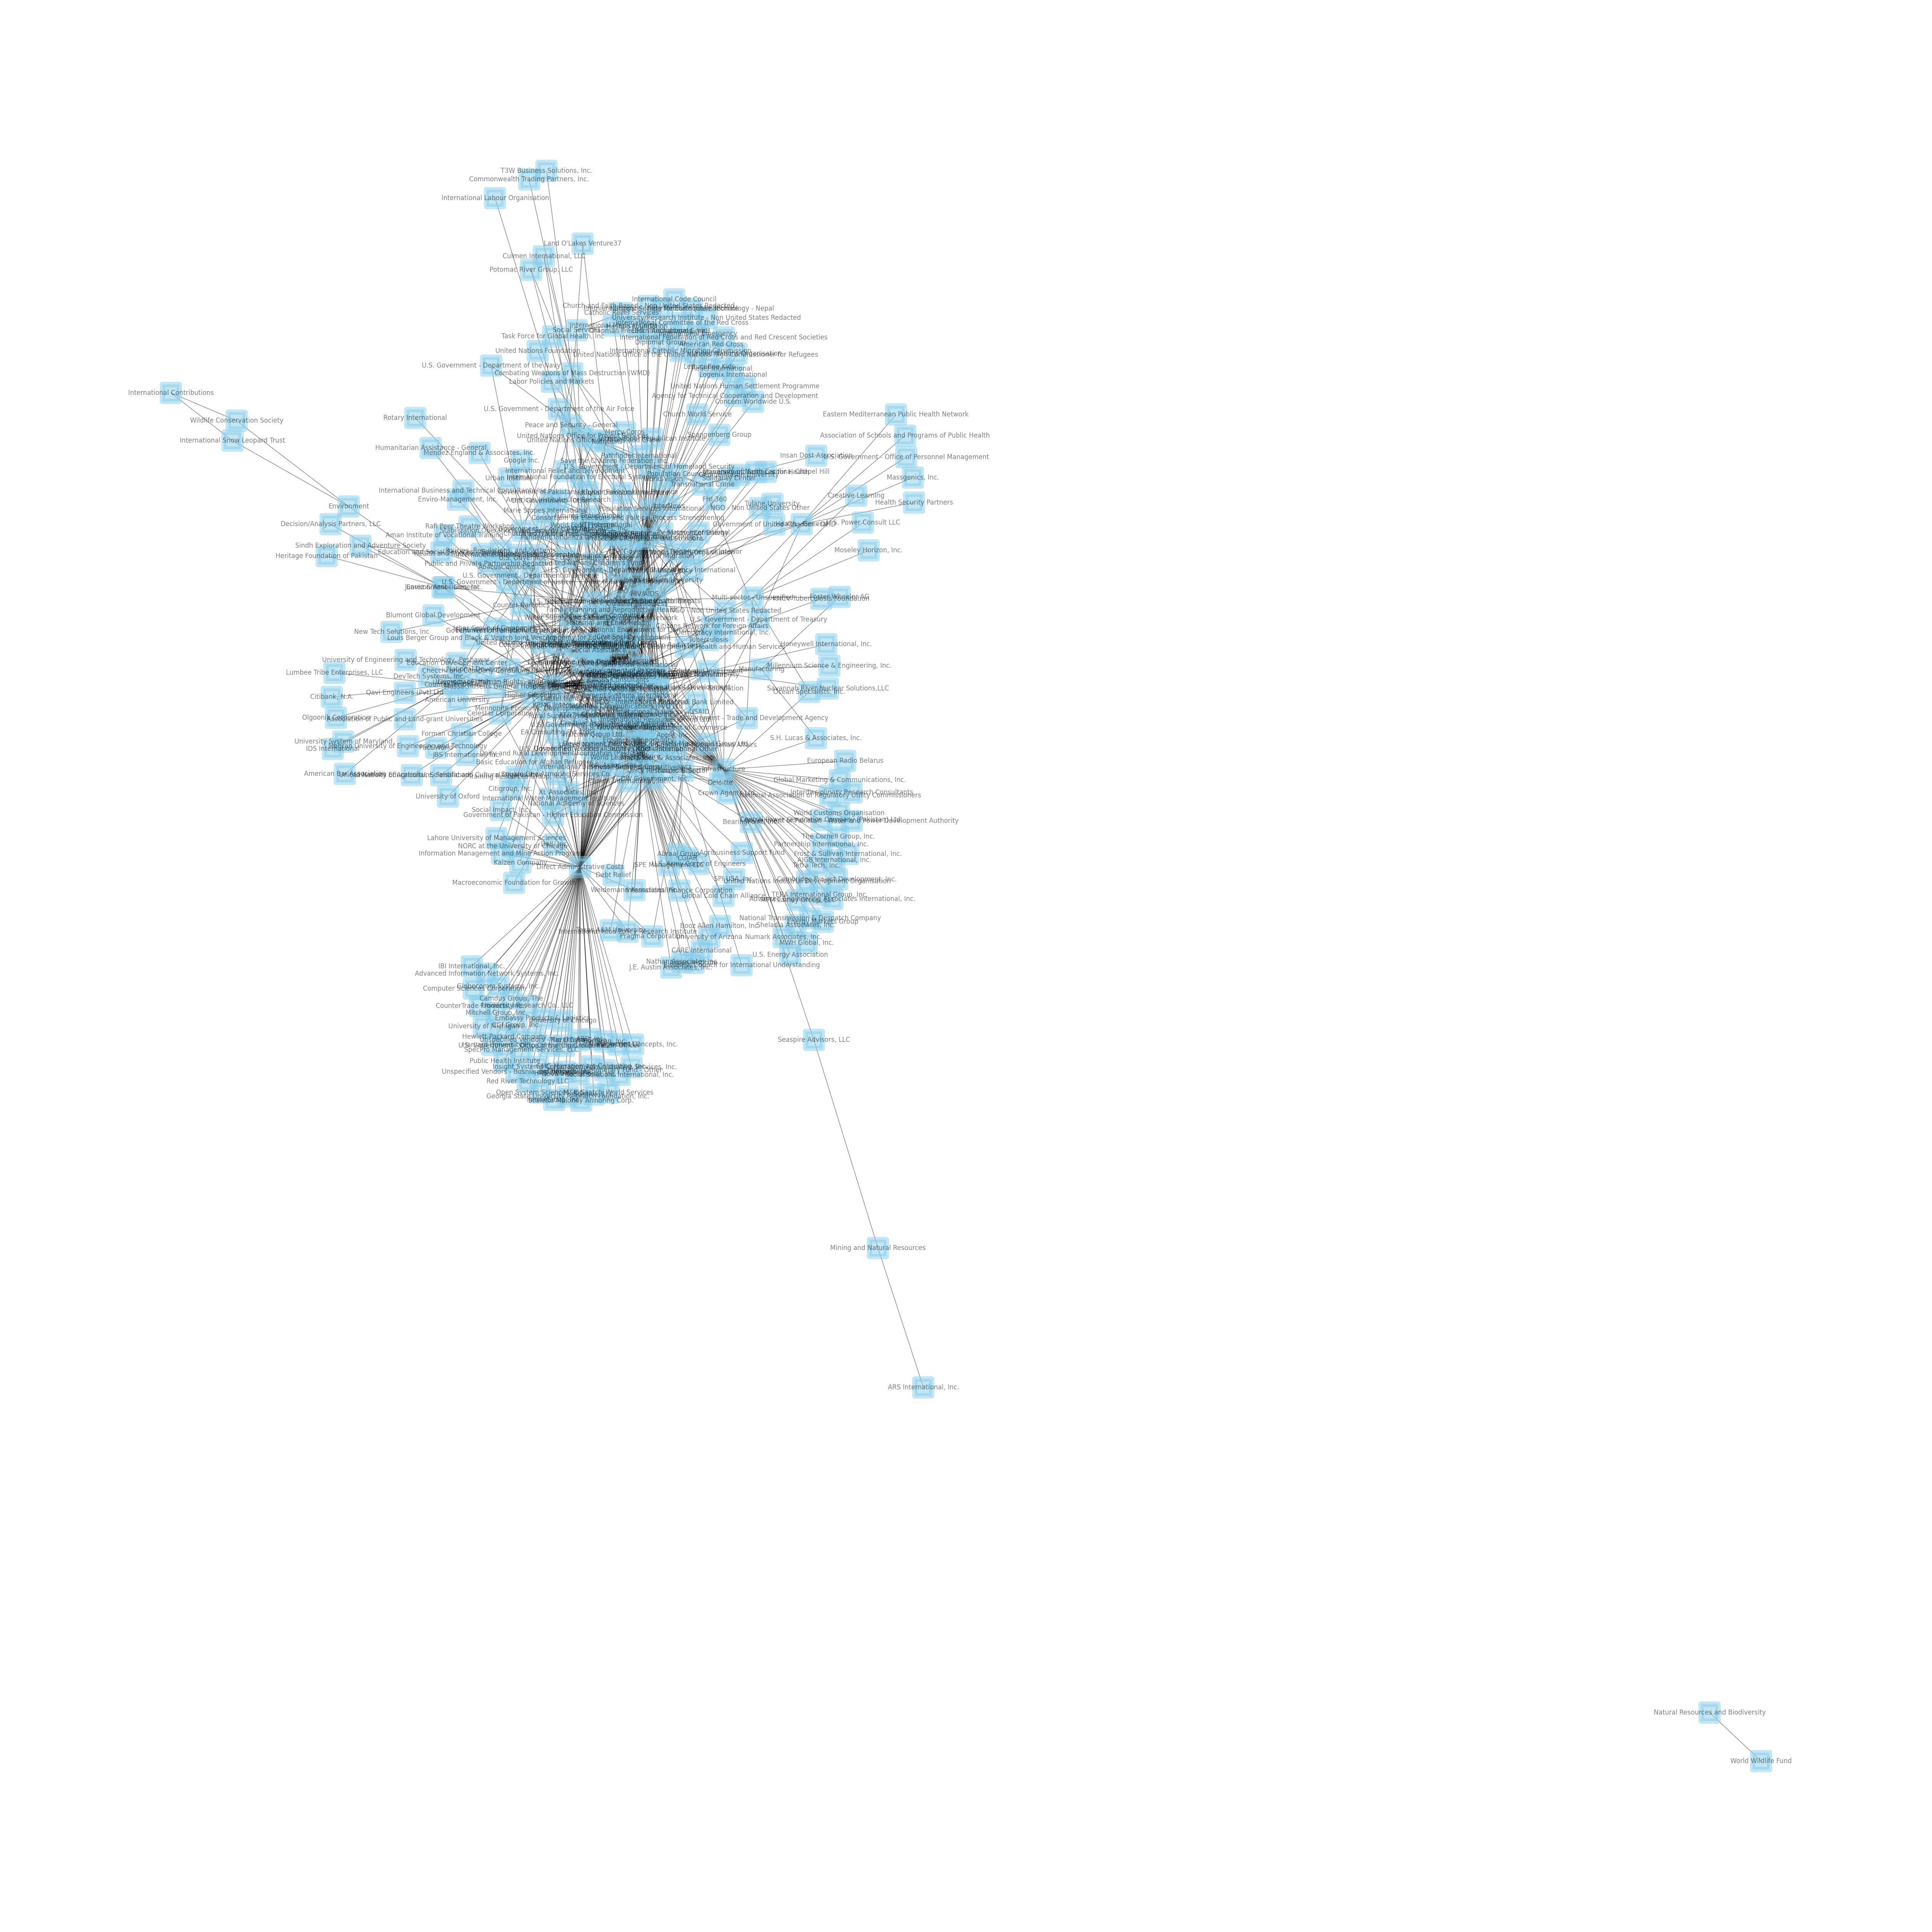

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a subset of the data
subset = data[['US Sector Name', 'Implementing Partner Name']]

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(subset, 'US Sector Name', 'Implementing Partner Name')

# Draw the graph
plt.figure(figsize=(50, 50))
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
plt.show()


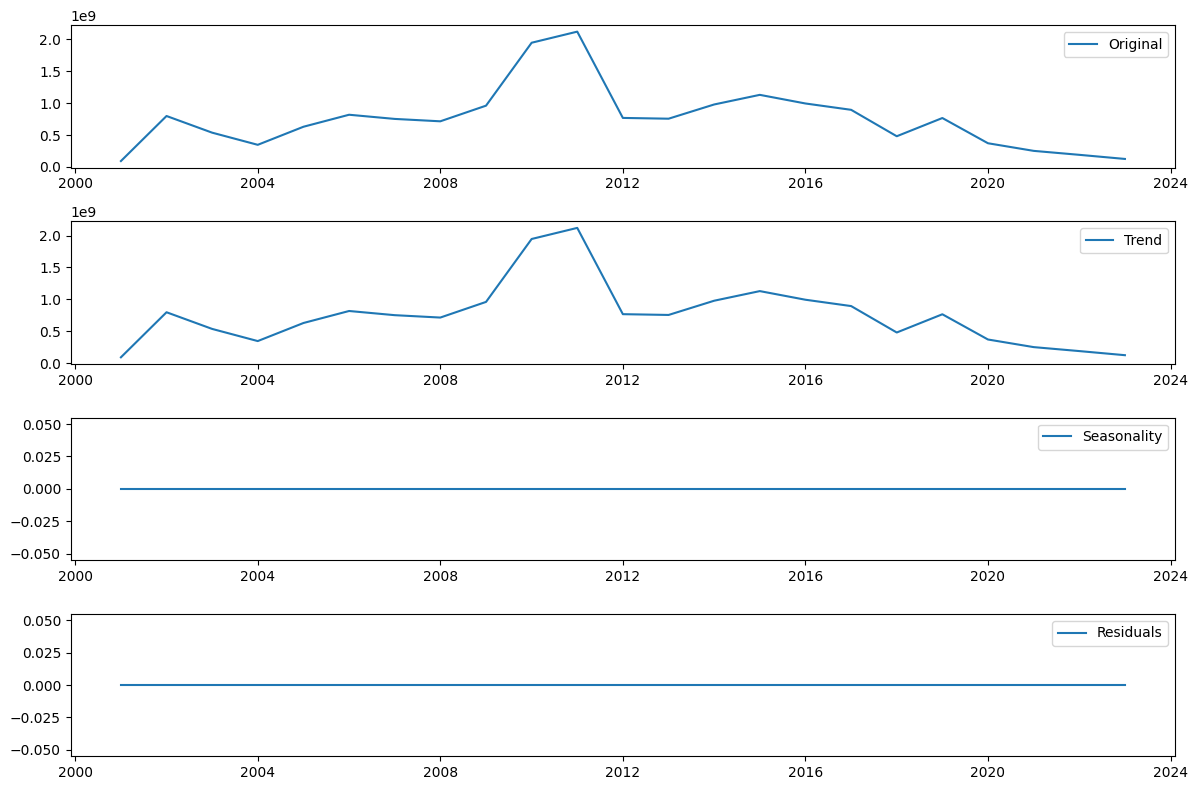

In [18]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt



# Group data by Fiscal Year and calculate the sum of Current Dollar Amount each year
yearly_aid = data.groupby('Fiscal Year')['Current Dollar Amount'].sum()

# Make sure that the Fiscal Year is the index of the dataframe
yearly_aid.index = pd.to_datetime(yearly_aid.index, format='%Y')

# Decompose the time series
decomposition = seasonal_decompose(yearly_aid)

# Plot the original data, the trend, the seasonality, and the residuals
plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(yearly_aid, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [20]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd


# Group data by category and calculate total aid for each category
category_aid = data.groupby('US Category Name')['Current Dollar Amount'].sum().reset_index()

# Create a bar chart of total aid by category
category_fig = px.bar(category_aid, x='US Category Name', y='Current Dollar Amount', labels={'US Category Name': 'Category', 'Current Dollar Amount': 'Total Aid'})

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    dcc.Graph(
        id='category-chart',
        figure=category_fig
    ),
    dcc.Graph(
        id='sector-chart'
    )
])

# Define the callback
@app.callback(
    Output('sector-chart', 'figure'),
    Input('category-chart', 'clickData')
)
def update_sector_chart(clickData):
    if clickData is None:
        # If no category is selected, don't display anything in the sector chart
        return {}
    else:
        # Get the selected category
        category = clickData['points'][0]['x']

        # Filter the data based on the selected category
        sector_data = data[data['US Category Name'] == category]

        # Group data by sector and calculate total aid for each sector
        sector_aid = sector_data.groupby('US Sector Name')['Current Dollar Amount'].sum().reset_index()

        # Create a bar chart of total aid by sector for the selected category
        sector_fig = px.bar(sector_aid, x='US Sector Name', y='Current Dollar Amount', labels={'US Sector Name': 'Sector', 'Current Dollar Amount': 'Total Aid'})

        return sector_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [21]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd


# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': i, 'value': i} for i in data['US Category Name'].unique()],
        placeholder='Select a category...'
    ),
    dcc.Graph(
        id='sector-chart'
    ),
    dcc.Dropdown(
        id='sector-dropdown',
        placeholder='Select a sector...'
    ),
    dcc.Graph(
        id='partner-chart'
    )
])

# Define the callback for the sector chart and sector dropdown
@app.callback(
    [Output('sector-chart', 'figure'), Output('sector-dropdown', 'options')],
    Input('category-dropdown', 'value')
)
def update_sector_chart_and_dropdown(selected_category):
    if selected_category is None:
        return {}, []
    else:
        # Filter the data based on the selected category
        sector_data = data[data['US Category Name'] == selected_category]

        # Group data by sector and calculate total aid for each sector
        sector_aid = sector_data.groupby('US Sector Name')['Current Dollar Amount'].sum().reset_index()

        # Create a bar chart of total aid by sector for the selected category
        sector_fig = px.bar(sector_aid, x='US Sector Name', y='Current Dollar Amount', labels={'US Sector Name': 'Sector', 'Current Dollar Amount': 'Total Aid'})

        # Create the options for the sector dropdown
        sector_options = [{'label': i, 'value': i} for i in sector_data['US Sector Name'].unique()]

        return sector_fig, sector_options

# Define the callback for the partner chart
@app.callback(
    Output('partner-chart', 'figure'),
    [Input('category-dropdown', 'value'), Input('sector-dropdown', 'value')]
)
def update_partner_chart(selected_category, selected_sector):
    if selected_category is None or selected_sector is None:
        return {}
    else:
        # Filter the data based on the selected category and sector
        partner_data = data[(data['US Category Name'] == selected_category) & (data['US Sector Name'] == selected_sector)]

        # Group data by implementing partner and calculate total aid for each partner
        partner_aid = partner_data.groupby('Implementing Partner Name')['Current Dollar Amount'].sum().reset_index()

        # Create a pie chart of total aid by implementing partner for the selected sector
        partner_fig = px.pie(partner_aid, values='Current Dollar Amount', names='Implementing Partner Name', labels={'Implementing Partner Name': 'Partner', 'Current Dollar Amount': 'Total Aid'})

        return partner_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [22]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd


# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': i, 'value': i} for i in data['US Category Name'].unique()],
        placeholder='Select a category...'
    ),
    dcc.Graph(
        id='sunburst-chart'
    )
])

# Define the callback for the sunburst chart
@app.callback(
    Output('sunburst-chart', 'figure'),
    Input('category-dropdown', 'value')
)
def update_sunburst_chart(selected_category):
    if selected_category is None:
        return {}
    else:
        # Filter the data based on the selected category
        filtered_data = data[data['US Category Name'] == selected_category]

        # Create a sunburst chart of total aid by sector and implementing partner for the selected category
        sunburst_fig = px.sunburst(
            filtered_data,
            path=['US Category Name', 'US Sector Name', 'Implementing Partner Name'],
            values='Current Dollar Amount',
            labels={'US Category Name': 'Category', 'US Sector Name': 'Sector', 'Implementing Partner Name': 'Partner', 'Current Dollar Amount': 'Total Aid'},
            color_continuous_scale='RdBu'
        )

        return sunburst_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [26]:
pip install dash-bootstrap-components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 16.6 MB/s eta 0:00:00


In [27]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd


# Initialize the Dash app with a Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout using Bootstrap components
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='category-dropdown',
                options=[{'label': i, 'value': i} for i in data['US Category Name'].unique()],
                placeholder='Select a category...'
            ),
        ], width=6),
    ], align='center'),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='treemap-chart'),
        ], width=12),
    ]),
], fluid=True)

# Define the callback for the treemap chart
@app.callback(
    Output('treemap-chart', 'figure'),
    Input('category-dropdown', 'value')
)
def update_treemap_chart(selected_category):
    if selected_category is None:
        return {}
    else:
        # Filter the data based on the selected category
        filtered_data = data[data['US Category Name'] == selected_category]

        # Create a treemap chart of total aid by sector and implementing partner for the selected category
        treemap_fig = px.treemap(
            filtered_data,
            path=['US Category Name', 'US Sector Name', 'Implementing Partner Name'],
            values='Current Dollar Amount',
            labels={'US Category Name': 'Category', 'US Sector Name': 'Sector', 'Implementing Partner Name': 'Partner', 'Current Dollar Amount': 'Total Aid'},
            color_continuous_scale='RdBu'
        )

        return treemap_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [28]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd


# Initialize the Dash app with a Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout using Bootstrap components
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='category-dropdown',
                options=[{'label': i, 'value': i} for i in data['US Category Name'].unique()],
                placeholder='Select a category...'
            ),
        ], width=6),
        dbc.Col([
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(i), 'value': i} for i in data['Fiscal Year'].unique()],
                value=data['Fiscal Year'].unique().tolist(),  # Default to all years
                multi=True,
                placeholder='Select fiscal years...'
            ),
        ], width=6),
    ], align='center'),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='treemap-chart'),
        ], width=12),
    ]),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='bubble-chart'),
        ], width=12),
    ]),
], fluid=True)

# Define the callback for the treemap chart
@app.callback(
    Output('treemap-chart', 'figure'),
    [Input('category-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_treemap_chart(selected_category, selected_years):
    if selected_category is None or selected_years is None:
        return {}
    else:
        # Filter the data based on the selected category and fiscal years
        filtered_data = data[(data['US Category Name'] == selected_category) & (data['Fiscal Year'].isin(selected_years))]

        # Create a treemap chart of total aid by sector and implementing partner for the selected category and fiscal years
        treemap_fig = px.treemap(
            filtered_data,
            path=['Fiscal Year', 'US Category Name', 'US Sector Name', 'Implementing Partner Name'],
            values='Current Dollar Amount',
            labels={'US Category Name': 'Category', 'US Sector Name': 'Sector', 'Implementing Partner Name': 'Partner', 'Current Dollar Amount': 'Total Aid'},
            color_continuous_scale='RdBu'
        )

        return treemap_fig

# Define the callback for the bubble chart
@app.callback(
    Output('bubble-chart', 'figure'),
    [Input('category-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_bubble_chart(selected_category, selected_years):
    if selected_category is None or selected_years is None:
        return {}
    else:
        # Filter the data based on the selected category and fiscal years
        filtered_data = data[(data['US Category Name'] == selected_category) & (data['Fiscal Year'].isin(selected_years))]

        # Group data by fiscal year and calculate total aid and total number of implementing partners for each year
        bubble_data = filtered_data.groupby('Fiscal Year').agg({'Current Dollar Amount': 'sum', 'Implementing Partner Name': 'nunique'}).reset_index()

        # Create a bubble chart of total aid by fiscal year, with the size of the bubbles representing the total number of implementing partners
        bubble_fig = px.scatter(
            bubble_data,
            x='Fiscal Year',
            y='Current Dollar Amount',
            size='Implementing Partner Name',
            labels={'Fiscal Year': 'Fiscal Year', 'Current Dollar Amount': 'Total Aid', 'Implementing Partner Name': 'Number of Implementing Partners'},
            size_max=60,
            title='Total Aid by Fiscal Year'
        )

        return bubble_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [29]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd



# Initialize the Dash app with a Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout using Bootstrap components
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='category-dropdown',
                options=[{'label': i, 'value': i} for i in data['US Category Name'].unique()],
                placeholder='Select a category...'
            ),
        ], width={'xs': 12, 'md': 6}),
        dbc.Col([
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(i), 'value': i} for i in data['Fiscal Year'].unique()],
                value=data['Fiscal Year'].unique().tolist(),  # Default to all years
                multi=True,
                placeholder='Select fiscal years...'
            ),
        ], width={'xs': 12, 'md': 6}),
    ]),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='treemap-chart'),
        ], width=12),
    ]),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='bubble-chart'),
        ], width=12),
    ]),
], fluid=True)

# Define the callback for the treemap chart
@app.callback(
    Output('treemap-chart', 'figure'),
    [Input('category-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_treemap_chart(selected_category, selected_years):
    if selected_category is None or selected_years is None:
        return {}
    else:
        # Filter the data based on the selected category and fiscal years
        filtered_data = data[(data['US Category Name'] == selected_category) & (data['Fiscal Year'].isin(selected_years))]

        # Create a treemap chart of total aid by sector and implementing partner for the selected category and fiscal years
        treemap_fig = px.treemap(
            filtered_data,
            path=['Fiscal Year', 'US Category Name', 'US Sector Name', 'Implementing Partner Name'],
            values='Current Dollar Amount',
            labels={'US Category Name': 'Category', 'US Sector Name': 'Sector', 'Implementing Partner Name': 'Partner', 'Current Dollar Amount': 'Total Aid'},
            color_continuous_scale='RdBu'
        )

        return treemap_fig

# Define the callback for the bubble chart
@app.callback(
    Output('bubble-chart', 'figure'),
    [Input('category-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_bubble_chart(selected_category, selected_years):
    if selected_category is None or selected_years is None:
        return {}
    else:
        # Filter the data based on the selected category and fiscal years
        filtered_data = data[(data['US Category Name'] == selected_category) & (data['Fiscal Year'].isin(selected_years))]

        # Group data by fiscal year and calculate total aid and total number of implementing partners for each year
        bubble_data = filtered_data.groupby('Fiscal Year').agg({'Current Dollar Amount': 'sum', 'Implementing Partner Name': 'nunique'}).reset_index()

        # Create a bubble chart of total aid by fiscal year, with the size of the bubbles representing the total number of implementing partners
        bubble_fig = px.scatter(
            bubble_data,
            x='Fiscal Year',
            y='Current Dollar Amount',
            size='Implementing Partner Name',
            labels={'Fiscal Year': 'Fiscal Year', 'Current Dollar Amount': 'Total Aid', 'Implementing Partner Name': 'Number of Implementing Partners'},
            size_max=60,
            title='Total Aid by Fiscal Year'
        )

        return bubble_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [30]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd



# Initialize the Dash app with a Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout using Bootstrap components
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='category-dropdown',
                options=[{'label': i, 'value': i} for i in data['US Category Name'].unique()],
                placeholder='Select a category...'
            ),
        ], width=6),
    ], align='center'),
    dbc.Row([
        dbc.Col([
            dcc.Graph(id='treemap-chart'),
        ], width=12),
    ]),
], fluid=True)

# Define the callback for the treemap chart
@app.callback(
    Output('treemap-chart', 'figure'),
    Input('category-dropdown', 'value')
)
def update_treemap_chart(selected_category):
    if selected_category is None:
        return {}
    else:
        # Filter the data based on the selected category
        filtered_data = data[data['US Category Name'] == selected_category]

        # Create a treemap chart of total aid by sector and implementing partner for the selected category
        treemap_fig = px.treemap(
            filtered_data,
            path=['US Category Name', 'US Sector Name', 'Implementing Partner Name'],
            values='Current Dollar Amount',
            labels={'US Category Name': 'Category', 'US Sector Name': 'Sector', 'Implementing Partner Name': 'Partner', 'Current Dollar Amount': 'Total Aid'},
            color_continuous_scale='RdBu'
        )

        return treemap_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>